In [168]:
# FEATURE SELECTION DEMO

# This demo is for understanding some of the commonly used feature selection methods and their implementation on ICU data.
# You can code in JupyterLite/Google colab, which are freely available.

In [169]:
import pandas as pd   # Pandas for data loading and tabular data manipulation
import numpy as np    # Numpy for numerical operations (will be used later for arrays, math, etc.)
import matplotlib.pyplot as plt   #Import matplotlib for visualizations (used later for plots)

pd.set_option('display.max_columns', None)
df = pd.read_excel('/content/Prognosis_Data.xlsx') # For loading the dataset. This dataset will be used to demonstrate feature selection
df.head()

,AGE,WEIGHT,GCSONTHEDAYOFICUADMISSIONE,GCSONTHEDAYOFICUADMISSIONM,TemperatureONTHEDAYOFICUADMISSION,HEARTRATEONTHEDAYOFICUADMISSION,RESPIRSTORYRATEONTHEDAYOFICUADMISSION,SPO2ONTHEDAYOFICUADMISSION,SOURCEOFSEPSISRESPIRATORYYESNO,FIO2ONTHEDAYOFADMISSION,RBS,LACTATE,PH,PCO2,PO2,PO2PCO2,HCO3,BE57etc,iCa2,mg2,hematocrit,CALCULATEDPFRATIO,HB,TLC,PLATELETCOUNT,PT,INR,APTT,UREA,CREATININE,UREACREAT,SODIUM,POTASSIUM,TOTALCALCIUM,CHLORIDE,TOTALBILIRUBIN,ALBUMIN,ALBUMINCREAT,SGOT,SGPT,ALP,PROCALCITONIN,LUNGBLINESNUMBERLEFTZONES123456ZONE1,LUNGBLINESNUMBERLEFTZONES123456ZONE2,LUNGBLINESNUMBERLEFTZONES123456ZONE3,LUNGBLINESNUMBERLEFTZONES123456ZONE4,LUNGBLINESNUMBERLEFTZONES123456ZONE5,LUNGBLINESNUMBERLEFTZONES123456ZONE6,RIGHTZONES123456ZONE1,RIGHTZONES123456ZONE2,RIGHTZONES123456ZONE3,RIGHTZONES123456ZONE4,RIGHTZONES123456ZONE5,RIGHTZONES123456ZONE6,CUMMULATIVELUNGUSGSCORE,PLEURALEFFUSION,RIGHTPLEURALEFFUSION,LEFTPLEURALEFFUSION,CONSOLIDATION,CONSOLIDATIONRIGHT,CONSOLIDATIONLEFT,LVContractility,LVEF,SOFASCORE,IllnessToFIRSTAntibiotics,DURATIONOFILLNESSBEFOREICUADMISSIONDAYSFromFirstKnewSymptomsToI,TYPEOFICUADMISSION,SepsisAtTheTimeOfICUAdmission,TV,RESPIRATORYRATE,RSBI,PEEP,Pplat,TYPEOFINTUBATION,PRONEVENTILATION,DURATIONOFILLNESSBEFOREINTUBATION,TRACHEOSTOMYDONE,SEX,SBP,DBP,SHOCKINDEX,VASOPRESSORS,RESPIRATORYPF300,CVCMAP65ORVASOPRESSORREQUIREMENT,RENALCREATININE15,LIVERINR15TBILIRUBIN2MGDL,CNSGCS15,MODEOFVENTILATION,REASONTYPE1RF,REASONTYPE2RF,REASONSHOCK,REASONGCS8,REASONAIRWAYPROTECTION,TYPE1RF,TYPE2RF,TYPE3RF,TYPE4RF,DURATIONOFMECHANICALVENTILATION,SEDATEDANDPARALYSED,VENTILATORYRATIO,OUTCOME
0,43,40,3,6,99.8,100,30,83,1,80,107,1.9,7.415,37.4,61.6,1.647059,23.5,-0.5,0.88,0.625,34.0,77.000000,11.2,8920,1.30,12.8,1.120,26.95,37.3,0.40,93.250000,153.0,3.3,7.0,116.0,0.90,2.40,6.000000,76.0,79.0,134.0,1.53,1,1,1,1,3,3,3,3,3,3,3,3,28,0,0,0,1,1,1,1,45.0,5,15.0,25.0,1,1,300.0,30,100.000000,10,26.0,0,0,35.0,0,1,112,76,0.892857,0,1,0,0,0,1,111,1,1,1,0,0,0,1,0,0,12.0,1,2.244000,0
1,34,55,4,5,101.0,146,25,66,1,100,176,2.2,7.057,94.3,108.3,1.148462,26.7,-3.8,1.07,0.560,39.0,108.300000,10.9,47700,0.49,11.4,1.589,17.80,165.0,5.30,31.132075,160.0,5.0,7.5,118.0,16.50,2.60,0.490566,421.0,57.0,160.0,3.41,2,2,3,3,3,3,2,3,2,2,2,2,29,1,1,1,1,1,1,1,45.0,16,2.0,3.0,1,1,400.0,25,62.500000,12,32.0,1,0,3.0,0,0,106,55,1.377358,1,1,1,1,1,1,111,0,0,1,0,0,1,0,0,0,2.0,0,4.572121,0
2,38,60,4,6,101.0,90,22,98,1,70,210,1.6,7.398,43.4,69.6,1.603687,27.0,2.0,0.98,0.565,23.0,99.428571,7.9,20600,2.09,22.9,1.790,55.00,111.0,1.22,90.983607,148.0,5.4,6.9,117.0,4.20,2.95,2.418033,1352.0,1840.0,166.0,4.17,1,1,1,1,2,2,1,1,1,1,1,1,14,0,0,0,0,0,0,1,45.0,12,2.0,15.0,0,1,480.0,20,41.666667,8,30.0,0,0,35.0,0,0,120,60,0.750000,1,1,1,0,1,1,111,0,0,1,0,0,1,0,0,0,2.0,0,1.851733,1
3,57,50,2,5,100.1,116,20,99,0,30,125,1.9,7.452,38.0,82.0,2.157895,26.0,-3.4,1.22,0.570,35.0,273.333333,9.1,16500,1.31,34.8,3.190,32.00,225.0,2.70,83.333333,134.0,3.8,10.3,90.0,7.97,3.30,1.222222,2283.0,3623.0,172.0,4.93,0,0,0,0,1,1,0,0,1,1,1,1,6,0,0,0,0,0,0,1,45.0,12,30.0,30.0,11,1,350.0,20,57.142857,5,18.0,0,0,13.0,1,1,96,51,1.208333,2,1,1,1,1,1,111,1,0,1,1,0,1,0,0,0,2.0,0,1.418667,1
4,57,65,4,5,101.0,130,30,99,0,40,132,0.9,7.315,26.3,84.7,3.220532,13.5,-12.9,1.10,0.400,28.0,211.750000,8.4,12910,1.60,11.9,1.000,36.00,229.0,5.60,40.892857,131.0,6.3,7.3,102.0,0.70,3.00,0.535714,1582.5,1871.0,150.5,1.30,2,1,1,1,2,2,1,1,1,1,2,2,17,0,0,0,0,0,0,1,35.0,12,3.0,13.0,11,1,300.0,30,100.000000,5,20.0,1,0,13.0,1,1,140,100,0.928571,1,1,1,1,0,1,111,1,0,1,0,0,1,0,0,0,5.0,0,0.971077,0


In [170]:
df.shape

(100, 101)

In [171]:
# Select a continuous clinical feature to examine its distribution
df['LACTATE'].describe()


,LACTATE
count,100.000000
mean,2.954000
std,2.943969
min,0.300000
25%,0.900000
50%,1.650000
75%,3.800000
max,13.200000


In [172]:
# Select a categorical clinical feature encoded numerically
df['SOURCEOFSEPSISRESPIRATORYYESNO'].value_counts()


,count
SOURCEOFSEPSISRESPIRATORYYESNO,
0,51
1,49


In [173]:
# Split the dataset into training and test sets BEFORE feature selection
# This prevents information leakage during feature selection
from sklearn.model_selection import train_test_split

X = df.drop(columns=['OUTCOME']) # Separate predictors from the outcome variable
y = df['OUTCOME']

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42,
    stratify=y
)

In [174]:
## FILTER METHODS

# Variance thresholding as a feature selection tool
from sklearn.feature_selection import VarianceThreshold
variances = X_train.var().sort_values(ascending=False) # Computes the variance of each feature
variances.head()

,0
TLC,7.549883e+07
SGPT,7.632678e+05
SGOT,5.567477e+05
TYPEOFICUADMISSION,2.089375e+05
CALCULATEDPFRATIO,3.302329e+04


In [175]:
# Primary candidates for removal using variance thresholding
variances.tail()

,0
iCa2,0.020393
mg2,0.020254
PH,0.018950
TYPE3RF,0.014286
SepsisAtTheTimeOfICUAdmission,0.000000


In [176]:
# Define a small variance threshold. Features with variance below this value will be removed
var_thresh = VarianceThreshold(threshold=0.2)

# Fit variance thresholding ONLY on training data
X_train_var = var_thresh.fit_transform(X_train)

# Apply the same transformation to the test data
X_test_var = var_thresh.transform(X_test)

# Retrieve names of features that survived variance thresholding
#selected_features_var = X_train.columns[var_thresh.get_support()]

# Standardize features after variance thresholding. (Required because logistic regression is scale-sensitive)
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
X_train_var_scaled = scaler.fit_transform(X_train_var)
X_test_var_scaled = scaler.transform(X_test_var)


# Train the logistic regression model
from sklearn.linear_model import LogisticRegression
model_var = LogisticRegression(max_iter=1000)
model_var.fit(X_train_var_scaled, y_train)

# Evaluate model performance using AUC on unseen test data
from sklearn.metrics import roc_auc_score
y_test_prob_var = model_var.predict_proba(X_test_var_scaled)[:, 1]
auc_var = roc_auc_score(y_test, y_test_prob_var)

print(f"Test AUC after variance thresholding: {auc_var:.3f}")
#print("Test AUC after variance thresholding:", auc_var)

Test AUC after variance thresholding: 0.598


In [177]:
#To see which features were eliminated

selector = VarianceThreshold(threshold=0.2)
selector.fit(X)

low_variance_features = X.columns[~selector.get_support()]

print("Low-variance features removed:")
print(low_variance_features.tolist())


Low-variance features removed:
['PH', 'iCa2', 'mg2', 'LVContractility', 'SepsisAtTheTimeOfICUAdmission', 'TYPEOFINTUBATION', 'PRONEVENTILATION', 'SHOCKINDEX', 'REASONTYPE2RF', 'REASONAIRWAYPROTECTION', 'TYPE3RF', 'TYPE4RF', 'SEDATEDANDPARALYSED']


In [178]:
X_train_var = X.loc[:, selector.get_support()]

print("Original number of features:", X.shape[1])
print("After variance thresholding:", X_train_var.shape[1])


Original number of features: 100
After variance thresholding: 87


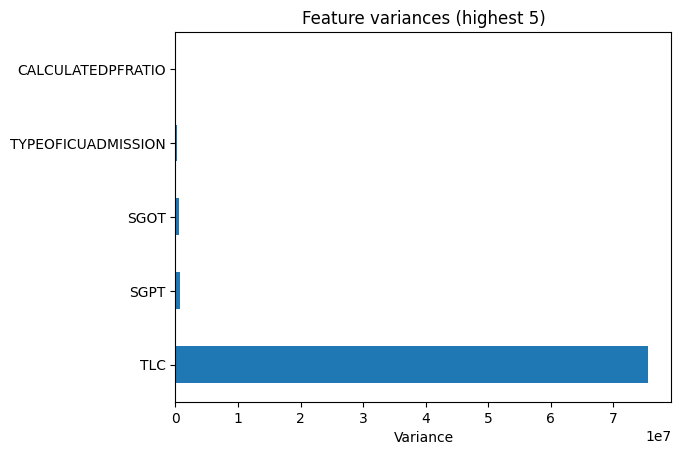

In [179]:
variances.head().plot(kind='barh')
plt.title("Feature variances (highest 5)")
plt.xlabel("Variance")
plt.show()

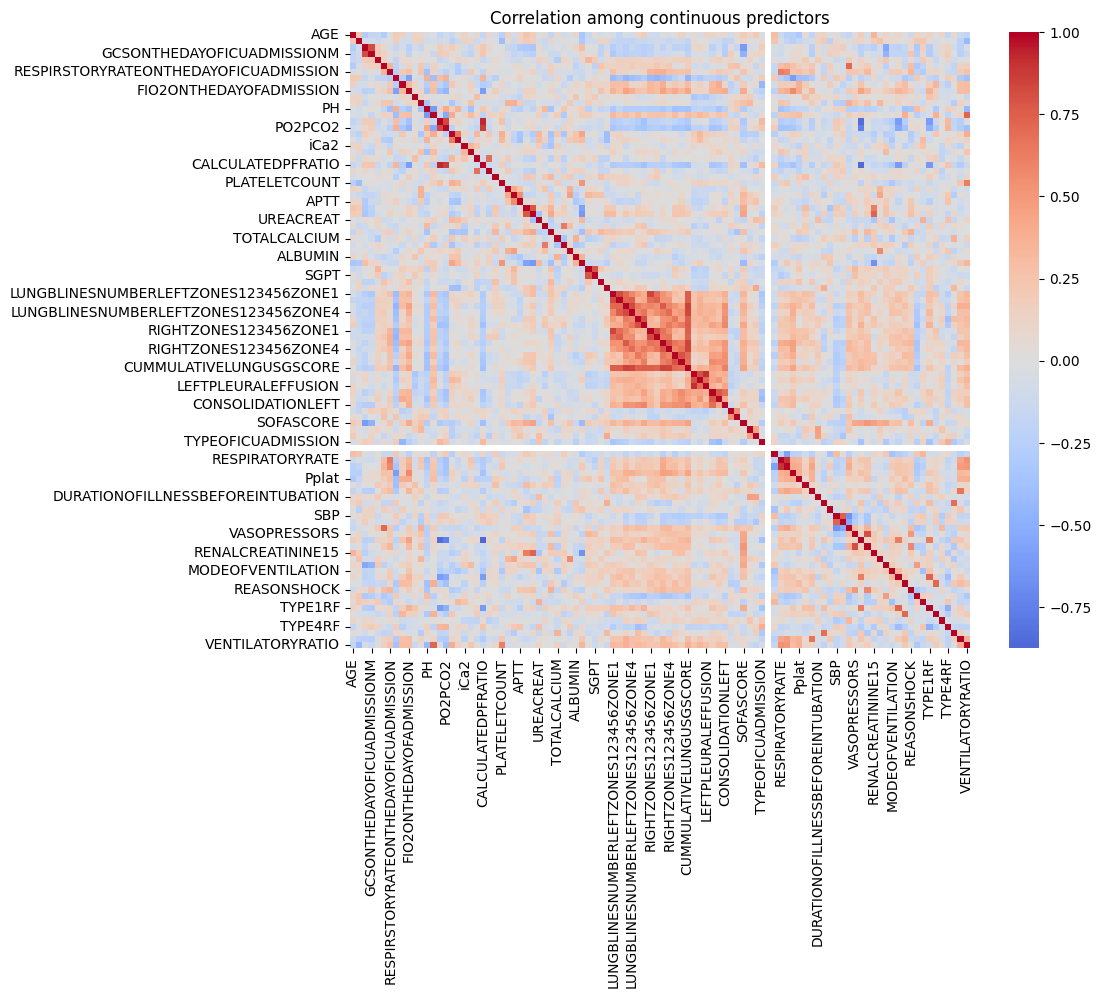

In [180]:
# Correlation testing between the predictors

import seaborn as sns # Import seaborn for visually inspecting correlations

corr_matrix = X_train.corr()  # Checks for pearson correlation by default

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, cmap='coolwarm', center=0)
plt.title("Correlation among continuous predictors")
plt.show()


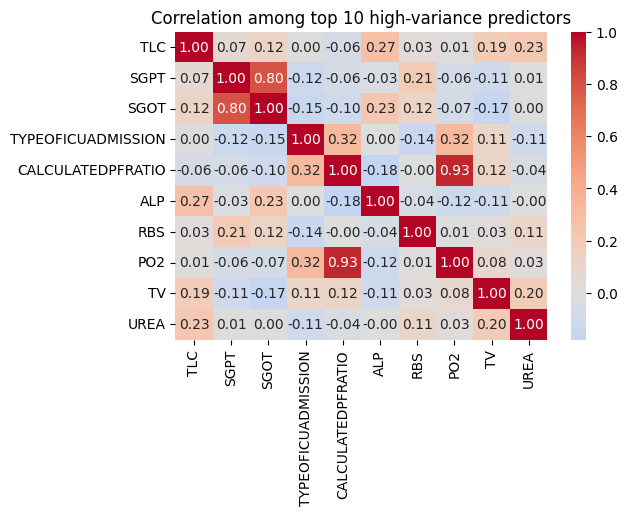

In [181]:
# Correlation testing between the predictors

import seaborn as sns # Import seaborn for visually inspecting correlations

top10_features = X_train.var().sort_values(ascending=False).head(10).index #Using variance thresholding, we choose top 10 features and then observe its correlation matrix

corr_subset = X_train[top10_features].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(
    corr_subset,
    annot=True,
    fmt=".2f",
    cmap="coolwarm",
    center=0
)
plt.title("Correlation among top 10 high-variance predictors")
plt.show()

In [182]:
# Compute Pearson correlation of each feature with the outcome
# For binary outcome, this corresponds to point-biserial correlation
corr_with_target = X_train.corrwith(y_train)

# Sort features by absolute correlation strength
corr_ranked = corr_with_target.abs().sort_values(ascending=False)

corr_ranked.head(10)


/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2922: RuntimeWarning: invalid value encountered in divide
  c /= stddev[:, None]
/usr/local/lib/python3.12/dist-packages/numpy/lib/_function_base_impl.py:2923: RuntimeWarning: invalid value encountered in divide
  c /= stddev[None, :]


,0
SOFASCORE,0.412353
PO2,0.400165
LACTATE,0.394525
SEDATEDANDPARALYSED,0.387139
SHOCKINDEX,0.375315
RESPIRATORYPF300,0.371807
PO2PCO2,0.359672
CALCULATEDPFRATIO,0.350073
LUNGBLINESNUMBERLEFTZONES123456ZONE6,0.340307
SBP,0.330977


In [183]:
# Select top 10 features most correlated with the outcome
top_k = 10
selected_features_corr = corr_ranked.head(top_k).index.tolist() #This takes the first 10 features from the ranked correlation list.
                                                                #We need to convert it into a list to feed it into model for training.


#STandardize the selected features before model training
X_train_corr_scaled = scaler.fit_transform(X_train[selected_features_corr])
X_test_corr_scaled = scaler.transform(X_test[selected_features_corr])

#Train
from sklearn.linear_model import LogisticRegression

model_corr = LogisticRegression(max_iter=1000)
model_corr.fit(X_train_corr_scaled, y_train)

#Test
from sklearn.metrics import roc_auc_score

y_test_prob_corr = model_corr.predict_proba(X_test_corr_scaled)[:, 1]
auc_corr = roc_auc_score(y_test, y_test_prob_corr)

print(f"Test AUC using top {top_k} outcome-correlated features: {auc_corr:.3f}")


Test AUC using top 10 outcome-correlated features: 0.643


In [184]:
# Feature selection using ANOVA

from sklearn.feature_selection import f_classif

f_scores, p_values = f_classif(X_train, y_train)

anova_df = pd.DataFrame({
    'Feature': X_train.columns,
    'F_score': f_scores,
    'p_value': p_values
}).sort_values('F_score', ascending=False)

anova_df.head(10)


/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:111: UserWarning: Features [67] are constant.
  warnings.warn("Features %s are constant." % constant_features_idx, UserWarning)
/usr/local/lib/python3.12/dist-packages/sklearn/feature_selection/_univariate_selection.py:112: RuntimeWarning: invalid value encountered in divide
  f = msb / msw


,Feature,F_score,p_value
63,SOFASCORE,13.931132,0.000390
14,PO2,12.965133,0.000598
11,LACTATE,12.535358,0.000726
98,SEDATEDANDPARALYSED,11.988392,0.000930
80,SHOCKINDEX,11.149034,0.001367
82,RESPIRATORYPF300,10.908293,0.001529
15,PO2PCO2,10.103790,0.002228
21,CALCULATEDPFRATIO,9.497395,0.002970
47,LUNGBLINESNUMBERLEFTZONES123456ZONE6,8.906434,0.003945
78,SBP,8.365525,0.005132


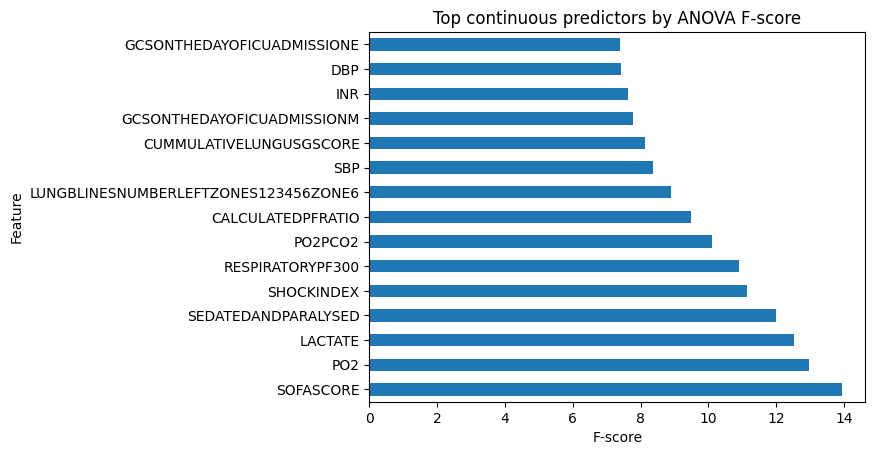

In [185]:
anova_df.head(15).plot(
    x='Feature',
    y='F_score',
    kind='barh',
    legend=False
)
plt.title("Top continuous predictors by ANOVA F-score")
plt.xlabel("F-score")
plt.show()


In [186]:
# Select top k features based on ANOVA F-score
top_k = 10
selected_features_anova = anova_df.head(top_k)['Feature'].tolist()

#Train
X_train_anova_scaled = scaler.fit_transform(X_train[selected_features_anova])
X_test_anova_scaled = scaler.transform(X_test[selected_features_anova])

model_anova = LogisticRegression(max_iter=1000)
model_anova.fit(X_train_anova_scaled, y_train)

y_test_prob_anova = model_anova.predict_proba(X_test_anova_scaled)[:, 1]
auc_anova = roc_auc_score(y_test, y_test_prob_anova)

print(f"Test AUC using top {top_k} ANOVA-selected features: {auc_anova:.3f}")

Test AUC using top 10 ANOVA-selected features: 0.643


In [187]:
#RFE

# RFE with linear models relies on coefficient magnitude
# Therefore, features must be standardized so coefficients are comparable

X_train_scaled = pd.DataFrame(
    scaler.fit_transform(X_train),
    columns=X_train.columns,
    index=X_train.index     #preserves original rows after scaling
)

X_test_scaled = pd.DataFrame(
    scaler.transform(X_test),
    columns=X_test.columns,
    index=X_test.index
)


# Define how many features we want to remove
max_remove = 90

# Start with all features
features = list(X_train_scaled.columns)

# Store RFE history for transparency
history = []

for step in range(1, max_remove + 1):

    # Train logistic regression on the current feature set
    model = LogisticRegression(max_iter=1000)
    model.fit(X_train_scaled[features], y_train)

    # Extract coefficients to assess feature importance
    coef_series = pd.Series(
        model.coef_[0],
        index=features
    )

    # Evaluate performance on the TEST set (unseen data)
    y_test_prob = model.predict_proba(X_test_scaled[features])[:, 1]
    test_auc = roc_auc_score(y_test, y_test_prob)

    # Identify the weakest feature based on absolute coefficient value
    weakest_feature = coef_series.abs().idxmin()

    # Store details of this elimination step
    history.append({
        "Step": step,
        "Removed_feature": weakest_feature,
        "Num_features_remaining": len(features),
        "Validation_AUC": test_auc,
        "Coefficients": coef_series.to_dict()
    })

    # Remove the weakest feature before the next iteration
    features.remove(weakest_feature)


In [188]:
# Train the final model using the remaining features after RFE
final_model = LogisticRegression(max_iter=1000)
final_model.fit(X_train_scaled[features], y_train)

# Evaluate final performance on the Validation set
final_test_prob = final_model.predict_proba(X_test_scaled[features])[:, 1]
final_test_auc = roc_auc_score(y_test, final_test_prob)

print("Final selected features after RFE:")
print(features)

print(f"\nFinal Validation AUC after removing {max_remove} features: {final_test_auc:.3f}")


Final selected features after RFE:
['SPO2ONTHEDAYOFICUADMISSION', 'LACTATE', 'PO2', 'TLC', 'INR', 'TYPEOFINTUBATION', 'DURATIONOFILLNESSBEFOREINTUBATION', 'SHOCKINDEX', 'TYPE2RF', 'SEDATEDANDPARALYSED']

Final Validation AUC after removing 90 features: 0.688


In [189]:
# Table showing which feature was removed at each step and why
rfe_table = pd.DataFrame([
    {
        "Step": h["Step"],
        "Removed_feature": h["Removed_feature"],
        "Coefficient_at_removal": h["Coefficients"][h["Removed_feature"]],
        "Absolute_coefficient": abs(h["Coefficients"][h["Removed_feature"]]),
        "Validation_AUC": h["Validation_AUC"],
        "Num_features_remaining": h["Num_features_remaining"]
    }
    for h in history
])

rfe_table

#NOTE: The Validation AUC stored at step k corresponds to the model before removing the feature at step k.
#The Validation AUC at step k+1 reflects the performance after the feature removed at step k is gone.


,Step,Removed_feature,Coefficient_at_removal,Absolute_coefficient,Validation_AUC,Num_features_remaining
0,1,SepsisAtTheTimeOfICUAdmission,0.000000,0.000000,0.611607,100
1,2,MODEOFVENTILATION,0.002082,0.002082,0.611607,99
2,3,hematocrit,-0.005016,0.005016,0.611607,98
3,4,mg2,-0.005635,0.005635,0.611607,97
4,5,RESPIRSTORYRATEONTHEDAYOFICUADMISSION,-0.022563,0.022563,0.611607,96
5,6,UREA,0.026855,0.026855,0.611607,95
6,7,HB,0.030813,0.030813,0.611607,94
7,8,ALBUMIN,0.038205,0.038205,0.611607,93
8,9,PO2PCO2,0.039847,0.039847,0.611607,92
9,10,REASONTYPE2RF,0.044620,0.044620,0.620536,91


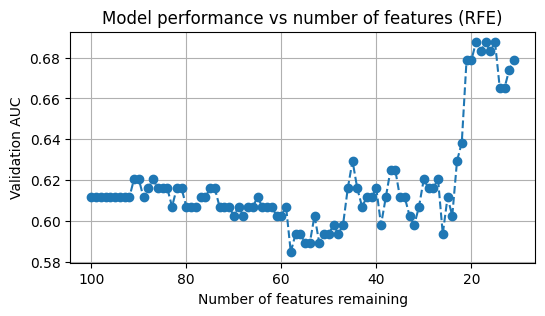

In [201]:
#Deciding how many features to choose after selection
plt.figure(figsize=(6, 3))
plt.plot(
    rfe_table["Num_features_remaining"],
    rfe_table["Validation_AUC"],
    marker='o',
    linestyle='--'
)
plt.xlabel("Number of features remaining")
plt.ylabel("Validation AUC")
plt.title("Model performance vs number of features (RFE)")
plt.grid(True)
plt.gca().invert_xaxis()
plt.show()

In [191]:
# This code uses one model and computes SHAP values using the selected model.
# It can also select top features and display model ROC with top SHAP features
# Works well for binary classifiers

import numpy as np
import pandas as pd
import shap
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import roc_auc_score

# Load Data
data = pd.read_excel('/content/Prognosis_Data.xlsx')
X = data.iloc[:, :-1]
y = data.iloc[:, -1]

# Train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.3, random_state=42
)

# Define model
model = RandomForestClassifier (random_state=42) # Increased max_iter to prevent ConvergenceWarning

# Train model
model.fit(X_train, y_train)

# Compute SHAP on training data if using for feature selection, for viusualization use test data
# Use shap.TreeExplainer for tree based models and shap.KernelExplainer for KNN, SVC, LR
explainer = shap.TreeExplainer(model)
shap_values = explainer.shap_values(X_train)

# For binary classification SHAP output
if isinstance(shap_values, list):
    shap_values = shap_values[1]
# If after the above, shap_values is still a 3D array (samples, features, classes),
# which is implied by the error, we need to explicitly select the positive class from the last dimension.
# This ensures shap_values becomes (samples, features)
if shap_values.ndim == 3 and shap_values.shape[2] == 2:
    shap_values = shap_values[:, :, 1]


# Global SHAP importance
# Now shap_values should be (samples, features), so mean(axis=0) will result in (features,)
shap_importance = np.abs(shap_values).mean(axis=0)

# Create importance dataframe
importance_df = pd.DataFrame({
    "Feature": X.columns,
    "Importance": shap_importance
}).sort_values(by="Importance", ascending=False)

print("Top Features Based on SHAP:")
pd.set_option('display.max_rows', None)
#display(importance_df)
importance_df.head(15)

Top Features Based on SHAP:


,Feature,Importance
11,LACTATE,0.046378
21,CALCULATEDPFRATIO,0.026305
15,PO2PCO2,0.026247
24,PLATELETCOUNT,0.025300
5,HEARTRATEONTHEDAYOFICUADMISSION,0.023371
80,SHOCKINDEX,0.021277
26,INR,0.020193
25,PT,0.014801
40,ALP,0.014319
79,DBP,0.014294


In [192]:
# Select Top K
K = 10
selected_features = importance_df.iloc[:K]["Feature"].tolist()
print("\nSelected Features:", selected_features)


Selected Features: ['LACTATE', 'CALCULATEDPFRATIO', 'PO2PCO2', 'PLATELETCOUNT', 'HEARTRATEONTHEDAYOFICUADMISSION', 'SHOCKINDEX', 'INR', 'PT', 'ALP', 'DBP']



Final AUROC = 0.7546


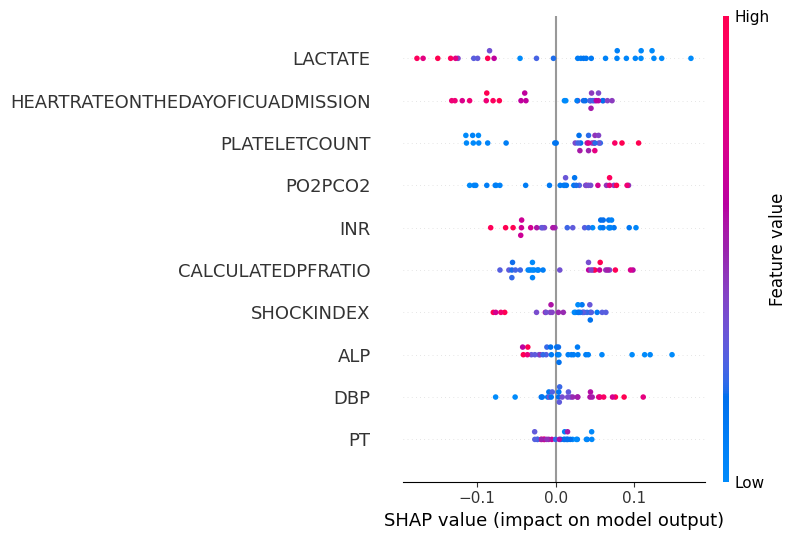

In [193]:
# Retrain model on top-K features
model.fit(X_train[selected_features], y_train)

# Final evaluation
y_pred_proba = model.predict_proba(X_test[selected_features])[:, 1]
auroc = roc_auc_score(y_test, y_pred_proba)
print(f"\nFinal AUROC = {auroc:.4f}")

# SHAP summary plot for interpretation
explainer_final = shap.TreeExplainer(model)
shap_values_final = explainer_final.shap_values(X_test[selected_features]) #Since we are visualizing, X_test is okay.

# Ensure shap_values_final is a list for the summary_plot to work correctly,
# and select the positive class. Handle case where it might be a 3D array.
if isinstance(shap_values_final, list):
    shap.summary_plot(shap_values_final[1], X_test[selected_features], feature_names=selected_features)
# If shap_values_final is a 3D array (samples, features, classes), select the positive class from the last dimension.
elif shap_values_final.ndim == 3 and shap_values_final.shape[2] == 2:
    shap.summary_plot(shap_values_final[:, :, 1], X_test[selected_features], feature_names=selected_features)
else:
    # Fallback if shap_values_final has an unexpected structure, log a warning
    print("Warning: shap_values_final has an unexpected structure for summary_plot.")
    # Attempt to plot, but it might still fail depending on the actual structure
    shap.summary_plot(shap_values_final, X_test[selected_features], feature_names=selected_features)


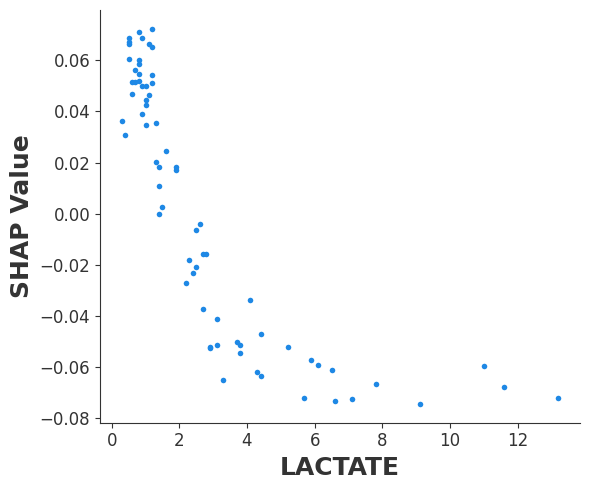

In [194]:
# For observing SHAP dependence plot for each feature

import shap
import matplotlib.pyplot as plt

shap.dependence_plot('LACTATE', shap_values, X_train, feature_names=X.columns, show=False, interaction_index=None)

plt.xlabel('LACTATE', fontsize=18, fontweight='bold')
plt.ylabel('SHAP Value', fontsize=18, fontweight='bold')
plt.xticks(fontsize=12)
plt.yticks(fontsize=12)
plt.tight_layout()

plt.show()

In [195]:
# For local interpretations
sample_idx = 0  # choose a patient
sample_shap = pd.Series(
    shap_values[sample_idx],
    index=X_train.columns
).sort_values(key=np.abs, ascending=False)

sample_shap.head(10)


,0
LACTATE,-0.067787
PLATELETCOUNT,-0.050804
DBP,-0.045460
SHOCKINDEX,-0.038590
HEARTRATEONTHEDAYOFICUADMISSION,-0.029916
CUMMULATIVELUNGUSGSCORE,0.029182
CALCULATEDPFRATIO,0.026220
BE57etc,-0.015526
PH,-0.015403
PO2PCO2,0.014215


In [196]:
#PCA

#Standardizing the data
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

#Applying PCA
from sklearn.decomposition import PCA
pca = PCA(n_components=5)
X_train_pca = pca.fit_transform(X_train_scaled)
X_test_pca = pca.transform(X_test_scaled)

#Examine
explained_variance = pca.explained_variance_ratio_
cumulative_variance = explained_variance.cumsum()

pca_variance_df = pd.DataFrame({
    "PC": [f"PC{i+1}" for i in range(len(explained_variance))],
    "Explained_variance_ratio": explained_variance,
    "Cumulative_variance": cumulative_variance
})

pca_variance_df.head(10)

,PC,Explained_variance_ratio,Cumulative_variance
0,PC1,0.145192,0.145192
1,PC2,0.085735,0.230927
2,PC3,0.059023,0.289950
3,PC4,0.049118,0.339068
4,PC5,0.044225,0.383294


In [197]:
from sklearn.linear_model import LogisticRegression

model = LogisticRegression(max_iter=1000)
model.fit(X_train_pca, y_train)

from sklearn.metrics import roc_auc_score

y_test_prob = model.predict_proba(X_test_pca)[:, 1]
test_auc = roc_auc_score(y_test, y_test_prob)

print(f"Test AUC using {len(pca_variance_df)} principal components: {test_auc:.3f}")



Test AUC using 5 principal components: 0.796


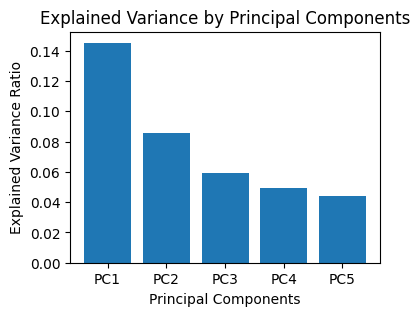

In [202]:
#Display of variance captured by each PC

plt.figure(figsize=(4, 3))

plt.bar(
    pca_variance_df["PC"],
    pca_variance_df["Explained_variance_ratio"]
)

plt.xlabel("Principal Components")
plt.ylabel("Explained Variance Ratio")
plt.title("Explained Variance by Principal Components")

plt.show()


In [199]:
## THE END